### Linear Regression Under the hood

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)
m = 100
n = 2

X = np.random.random((m,n)) #features
y = (10 +3.5 * X[:, 0] + 5 * X[:, 1] + np.random.random(m)).reshape(m,1)
# y = b + w1 * X1 + w2 * X2
# b = 10, w1 = 3.5, w2 = 5

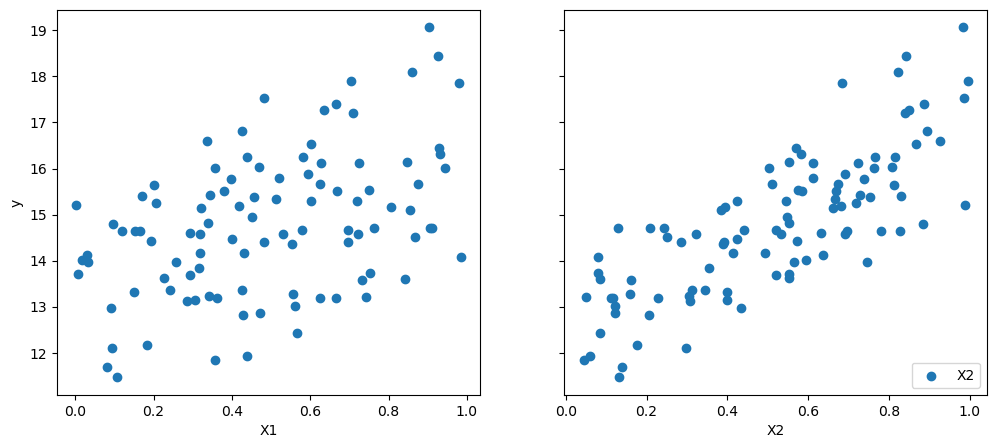

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)
ax1.scatter(X[:, 0], y[:,0], label="X1")
ax2.scatter(X[:, 1], y[:,0], label="X2")
ax1.set_xlabel("X1")
ax1.set_ylabel("y")
ax2.set_xlabel("X2")
plt.legend(loc="lower right")
plt.show()

### 1. Direct Equation / Normal Equation

$\text {hypothesis function} \hat y = H(X, \theta) = \theta X$

$\text {cost function} J(\theta) = \frac {1} {m} \sum {(\theta X_i - y_i)}^2$

$\text {normal equation} (\theta) = {(XX^T)}^{-1} X^Ty$

##### y = mx + c

$ \hat y = H(b, w, X) = b + wX $

$ J_{(b,w)} = MSE(b,w) = \frac {1} {m} \sum {((b+wx_i) - y_i)}^2 $  
->(b+wx_i) is our prediction

$ w = \frac {\sum (y-\bar y) (x - \bar x)} {\sum {(x - \bar x)}^2}$

$ b = \bar y - w * \bar x $

In [4]:
y = y.reshape(-1,1)

In [5]:
y.shape

(100, 1)

In [6]:
X.shape

(100, 2)

In [7]:
X[:5]

array([[0.69646919, 0.28613933],
       [0.22685145, 0.55131477],
       [0.71946897, 0.42310646],
       [0.9807642 , 0.68482974],
       [0.4809319 , 0.39211752]])

In [8]:
# to get m rows
# np.ones((m,1)) # m = no. of rows (100)
# to stack these rows at a column in matrix
# X_b = X bias
X_b = np.c_[np.ones((m,1)), X]
# X_0, X1, X2
X_b[:5]
# the column containing 1 is 0o representative

array([[1.        , 0.69646919, 0.28613933],
       [1.        , 0.22685145, 0.55131477],
       [1.        , 0.71946897, 0.42310646],
       [1.        , 0.9807642 , 0.68482974],
       [1.        , 0.4809319 , 0.39211752]])

In [9]:
from numpy.linalg import inv

In [10]:
X_b.T @ y

array([[1478.55321448],
       [ 743.90991609],
       [ 795.32508043]])

In [11]:
thetas = (np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y).flatten()
# use ravel() and flatten to covert it to 1-D matrix

In [12]:
thetas
# y = 10 + 3.5 * X[:, 0] + 5 * X[:, y]  + np.random.random(m)).reshape(m,1)

array([10.48275592,  3.37316327,  5.1320469 ])

In [13]:
def predict(X, thetas):
    y_hat = thetas[0] + thetas[1]*X[:,0] + thetas[2]*X[:,1]
    return y_hat

In [14]:
y_hat = predict(X, thetas)

In [15]:
y[:5]

array([[14.41097475],
       [13.61732838],
       [15.28703857],
       [17.85290971],
       [14.41324658]])

In [16]:
y_hat[:5]

array([14.30054069, 14.07733616, 15.08104442, 17.30561203, 14.11738324])

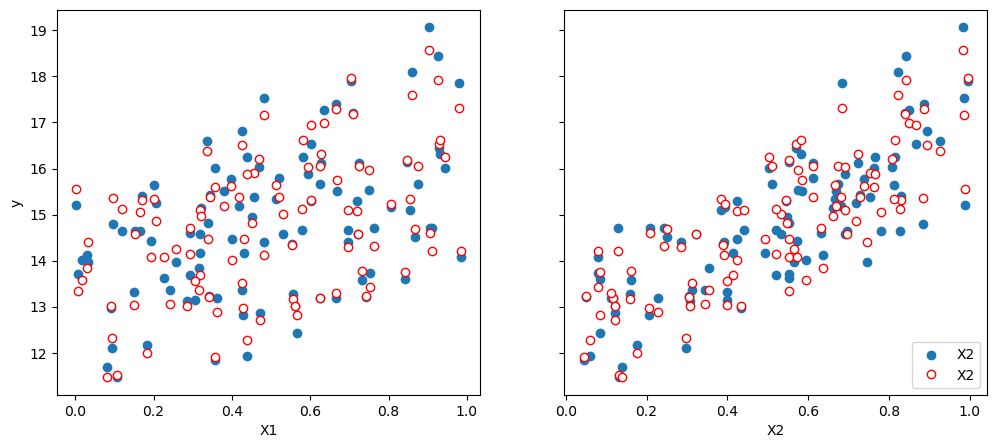

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)

ax1.scatter(X[:, 0], y[:,0], label="X1")
ax2.scatter(X[:, 1], y[:,0], label="X2")

ax1.plot(X[:, 0], y_hat, 'o', label='X1', mfc = 'w', mec = 'r')
ax2.plot(X[:, 1], y_hat, 'o', label='X2', mfc = 'w', mec = 'r')
ax1.set_xlabel("X1")
ax1.set_ylabel("y")
ax2.set_xlabel("X2")
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

In [19]:
class myLinearRegression(BaseEstimator, TransformerMixin):
    def __init__(self,):# __init__(self,) is used for initialization
        self.__thetas = None # we define our hyper-parameters in self
        
    def fit(self, X, y):
        X_b = np.c_[np.ones(X.shape[0]), X]
        y = y.reshape(-1,1)
        self.__thetas = (np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y).flatten() # Batch Learning O(N^3)
        self.intercept_ = self.__thetas[0]
        self.coef_ = self.__thetas[1:]

    def predict(self, X):
        X_b = np.c_[np.ones(X.shape[0]), X]
        y_hat = thetas[0] + thetas[1]*X[:,0] + thetas[2]*X[:,1]
        return y_hat

In [20]:
reg = myLinearRegression()

In [21]:
X.shape

(100, 2)

In [22]:
y = y.flatten()

In [23]:
X[:5]

array([[0.69646919, 0.28613933],
       [0.22685145, 0.55131477],
       [0.71946897, 0.42310646],
       [0.9807642 , 0.68482974],
       [0.4809319 , 0.39211752]])

In [24]:
y[:5]

array([14.41097475, 13.61732838, 15.28703857, 17.85290971, 14.41324658])

In [25]:
model = myLinearRegression()

In [26]:
model.fit(X, y)

In [27]:
model.coef_

array([3.37316327, 5.1320469 ])

In [28]:
model.intercept_ # theta_0

10.482755922362326

In [29]:
y_hat = model.predict(X)

In [30]:
y_hat[:5]

array([14.30054069, 14.07733616, 15.08104442, 17.30561203, 14.11738324])

In [31]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_hat, y))

0.09439284942281502


In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [33]:
lin_reg.intercept_ # theta0

10.482755922362315

In [34]:
lin_reg.coef_ # theta1, theta2

array([3.37316327, 5.1320469 ])